In [3]:
import os
from dotenv import load_dotenv
load_dotenv()

from langchain_groq import ChatGroq

os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
os.environ["HF_TOKEN"]=os.getenv("HF_TOKEN")

llm = ChatGroq(model="qwen-qwq-32b")

In [4]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma, FAISS
from langchain_community.embeddings import HuggingFaceBgeEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter

USER_AGENT environment variable not set, consider setting it to identify your requests.


## **Retriever for the LangGraph**

In [5]:
urls = [
    "https://langchain-ai.github.io/langgraph/",
    "https://modelcontextprotocol.io/introduction",
    "https://langchain-ai.github.io/langgraph/agents/multi-agent/"
]

In [6]:
docs = [WebBaseLoader(url).load() for url in urls]
len(docs)

3

In [7]:
doc_list = [item for sublist in docs for item in sublist]

text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=150)

doc_splits = text_splitter.split_documents(documents=doc_list)
print(doc_splits[1:3])

[Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/', 'title': 'LangGraph', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='Deployment\n    \n  \n\n\n\n\n\n\n\n\n\n    Prebuilt agents\n    \n  \n\n\n\n\n\n            Prebuilt agents\n          \n\n\n\n\n    Overview\n    \n  \n\n\n\n\n\n    Running agents\n    \n  \n\n\n\n\n\n    Streaming\n    \n  \n\n\n\n\n\n    Models\n    \n  \n\n\n\n\n\n    Tools\n    \n  \n\n\n\n\n\n    MCP Integration\n    \n  \n\n\n\n\n\n    Context\n    \n  \n\n\n\n\n\n    Memory\n    \n  \n\n\n\n\n\n    Human-in-the-loop\n    \n  \n\n\n\n\n\n    Multi-agent\n    \n  \n\n\n\n\n\n    Evals\n    \n  \n\n\n\n\n\n    Deployment\n    \n  \n\n\n\n\n\n    UI\n    \n  \n\n\n\n\n\n\n\n\n\n    LangGraph framework\n    \n  \n\n\n\n\n\n            LangGraph framework\n          \n\n\n\n\n    Agent architectures\n    \n  \n\n\n\n\n\n\n    Graphs\n    \n  \n\n\n\n\n\n\n    Streaming\n    

## ***Use HuggingFace Embedding Model***

In [8]:
embeddings = HuggingFaceBgeEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

c:\Users\Lenovo\anaconda3\envs\lang_aca\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
vectorstore = FAISS.from_documents(
    documents=doc_splits,
    embedding=embeddings,
)

langGraph_retriever = vectorstore.as_retriever()

In [10]:
query = "Why Lnaggraph is important?"

response = langGraph_retriever.invoke(query)
response

[Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/', 'title': 'LangGraph', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='LangGraph\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n          Skip to content\n        \n\n\n\n\n\n\n\nWe are growing and hiring for multiple roles for LangChain, LangGraph and LangSmith.  Join our team!\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            LangGraph\n          \n\n\n\n            \n              LangGraph\n            \n          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            Initializing search\n          \n\n\n\n\n\n\n\n\n\n\n\n\n    GitHub\n  \n\n\n\n\n\n\n\n\n          \n  \n  \n    \n  \n  Guides\n\n        \n\n\n\n          \n  \n  \n    \n  \n  Reference\n\n        \n\n\n\n          \n  \n  \n    \n  \n  Examples\n\n        \n\n\n\n          \n  \n  \n    \n  \n  Resources\n\n        \n\n\n\n\n\n\n\n\n\n\n\n\n\n

## Make this retriever into a retriever tools

In [11]:
from langchain.tools.retriever import create_retriever_tool

langGraph_retriever_tool = create_retriever_tool(
    langGraph_retriever,
    "retriever_vector_db_blog",
    "Search and run information abut Model Context Protocol(MCP) and multi-agent system."
)

In [12]:
langGraph_retriever_tool

Tool(name='retriever_vector_db_blog', description='Search and run information abut Model Context Protocol(MCP) and multi-agent system.', args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=functools.partial(<function _get_relevant_documents at 0x0000020B92E9C180>, retriever=VectorStoreRetriever(tags=['FAISS', 'HuggingFaceBgeEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x0000020BB2A78F50>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_separator='\n\n', response_format='content'), coroutine=functools.partial(<function _aget_relevant_documents at 0x0000020B92E9F560>, retriever=VectorStoreRetriever(tags=['FAISS', 'HuggingFaceBgeEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x0000020BB2A78F50>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_typ

# **LangChain blogs - Separate Vector DB**

In [13]:
urls = [
    "https://python.langchain.com/docs/tutorials/",
    "https://python.langchain.com/docs/introduction/",
    "https://python.langchain.com/docs/versions/v0_3/"   
]

In [14]:
docs = [WebBaseLoader(url).load() for url in urls]
len(docs)

3

In [15]:
doc_list = [item for sublist in docs for item in sublist]

In [16]:
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1500,
    chunk_overlap=200
)

doc_splits = text_splitter.split_documents(documents=doc_list)

vectorstore_langChain = FAISS.from_documents(
    documents=doc_splits,
    embedding=embeddings
)

In [17]:
langChain_retriever = vectorstore_langChain.as_retriever()

langChain_retriever.invoke("Why langChain?")

[Document(metadata={'source': 'https://python.langchain.com/docs/introduction/', 'title': 'Introduction | 🦜️🔗 LangChain', 'description': 'LangChain is a framework for developing applications powered by large language models (LLMs).', 'language': 'en'}, page_content='Introduction | 🦜️🔗 LangChain'),
 Document(metadata={'source': 'https://python.langchain.com/docs/versions/v0_3/', 'title': 'LangChain v0.3 | 🦜️🔗 LangChain', 'description': 'Last updated: 09.16.24', 'language': 'en'}, page_content='LangChain v0.3 | 🦜️🔗 LangChain'),
 Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/', 'title': 'Tutorials | 🦜️🔗 LangChain', 'description': 'New to LangChain or LLM app development in general? Read this material to quickly get up and running building your first applications.', 'language': 'en'}, page_content='Tutorials | 🦜️🔗 LangChain'),
 Document(metadata={'source': 'https://python.langchain.com/docs/introduction/', 'title': 'Introduction | 🦜️🔗 LangChain', 'description': 

In [18]:
langChain_retriever_tool = create_retriever_tool(
    retriever=langChain_retriever,
    name="Retriever_vector_langchain_blog",
    description="Search and run information about langchain tutorial and different version."
)

In [19]:
langChain_retriever_tool

Tool(name='Retriever_vector_langchain_blog', description='Search and run information about langchain tutorial and different version.', args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=functools.partial(<function _get_relevant_documents at 0x0000020B92E9C180>, retriever=VectorStoreRetriever(tags=['FAISS', 'HuggingFaceBgeEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x0000020BB2AC8ED0>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_separator='\n\n', response_format='content'), coroutine=functools.partial(<function _aget_relevant_documents at 0x0000020B92E9F560>, retriever=VectorStoreRetriever(tags=['FAISS', 'HuggingFaceBgeEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x0000020BB2AC8ED0>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types

In [20]:
tools = [langChain_retriever_tool, langGraph_retriever_tool]

# ***Now Time To Build The Agentic RAG***

In [22]:
from langchain_core.messages import HumanMessage
llm.invoke([HumanMessage(content="Hello sir!!")])

AIMessage(content='\n<think>\nOkay, the user said "Hello sir!!". I need to respond appropriately. Let me start with a friendly greeting. Maybe "Hello! How can I assist you today?" That\'s standard but polite.\n\nWait, they used "sir", maybe they expect a more formal response? Should I use "Good day" instead? Hmm, but "Hello" is also common. Let me check if there\'s any context I\'m missing. Since it\'s the first message, probably not. Keep it simple and open-ended. Make sure to offer help. Yeah, that should be good. Let me go with that.\n</think>\n\nHello! How can I assist you today? 😊', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 138, 'prompt_tokens': 13, 'total_tokens': 151, 'completion_time': 0.335488406, 'prompt_time': 0.002878349, 'queue_time': 0.162174466, 'total_time': 0.338366755}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_512a3da6bb', 'finish_reason': 'stop', 'logprobs': None}, id='run--f4197476-16bb-4ee8-83b9-72f5fb521f8f-0', us

In [23]:
from typing import Annotated, Sequence
from typing_extensions import TypedDict

from langchain_core.messages import BaseMessage, HumanMessage, SystemMessage
from langgraph.graph.message import add_messages

class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], add_messages]

In [24]:
llm_with_tools = llm.bind_tools(tools)

In [27]:
def agent(state: AgentState):
    """
    Invokes the agent model to generate a response based on the current state. Given the question,
    it will decide to retrieve using the retriever tool, or simple end e.g. like response by llm only.
    
    Args:
        state(messages): The current state.
    
    Returns:
        dict: The update state with the agent response appended to messages.
    
    """
    print("--Calling Agent--")
    messages = state['messages']
    response = llm_with_tools.invoke(messages)
    
    print(response)
    # we return the list, because this will get added to the existing list.
    return {
        "messages": [response]
    }
    

In [29]:
from langchain import hub
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate
from typing import List, Literal
from pydantic import BaseModel, Field


def grade_documents(state: AgentState) -> Literal["generate", "rewrite"]:
    """
    Determine the retrieved documents are relevant to the question or not.
    
    Args:
        state(messages): The current state.
    
    Return:
        str: A decision for weather the document are relevant or not.
    """
    
    print("---Checking The document---")
    
    ## Data schema
    class Grade(BaseModel):
        """Binary score for relevance score check."""
        binary_score: Literal['yes', 'no'] = Field(description="relevance score 'yes' or 'no' ")
        
    llm_with_str_op = llm.with_structured_output(Grade)
    
    ## Define the prompt
    prompt = PromptTemplate(
        template="""
        You are a grader assessing relevance of a retrieved document toa user question. \n
        Here is the retrieve document: \n\n {context} \n\n
        And this is the user question: {question} \n
        if the document contains keyword(s) or semantic meaning related to the user question grade it as relevant.\n
        Give a binary score 'yes' or 'no' score to indicate whether the document is relevant ot the question.
        """,
        input_variables=["context", "question"]
    )
    
    chain = prompt | llm_with_str_op
    
    messages = state["messages"]
    last_messages = messages[-1]
    docs = last_messages.content
    question = messages[0].content
    print(question)
    
    scored_result = chain.invoke(
        {
            "context": docs,
            "question": question
        }
    )
    
    score = scored_result.binary_score
    
    if score == 'yes':
        print("---Decision: docs is relevance")
        return "generate"
    else:
        print("---This is not relevance---")
        return "rewrite"

In [30]:
def generate(state: AgentState):
    """
    Generate answer based on the context and user query.
    
    Args:
        state(messages): The current state
        
    Returns:
        dict: The updated messages
    """
    
    print("---Generative---")
    messages = state["messages"]
    question = messages[0].content
    docs = messages[-1].content
    
    prompt = hub.pull("rlm/rag-prompt")
    
    ## format the docs
    def format_docs(docs):
        return "\n\n".join(doc.page_content for doc in docs)
    
    parser = StrOutputParser()
    ## rag chain
    rag_chain = prompt | llm | parser
    
    ## run
    response = rag_chain.invoke(
        {
            "context": docs,
            "question": question
        }
    )
    
    return {
        "messages": [response]
    }

In [31]:
def rewrite(state: AgentState):
    """
    Transform the query to produce a bette question.
    
    Args:
        state(messages): the current state
        
    Returns:
        dict: THe updated state with re-phrased question.
    
    """
    
    print("--Transform query")
    messages = state['messages']
    question = messages[0].content
    
    msg = [
        HumanMessage(content=f"""\n
                     Look at the input and try to reason about the underlying semantic intent meaning. \n
                     Here is the initial question:
                     \n\n
                     {question}\n\n
                     Formulate an improve question: 
                     """,)
    ]
    response = llm.invoke(msg)
    return {
        "messages": [response]
    }

## **Build the graph**

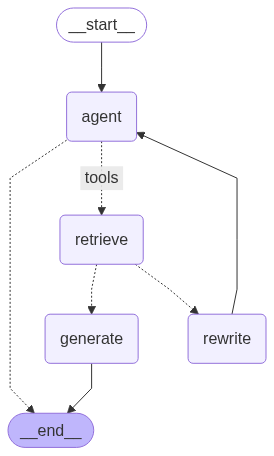

In [32]:
from langgraph.graph import START, StateGraph, END
from langgraph.prebuilt import ToolNode, tools_condition
from IPython.display import display, Image

workflow = StateGraph(AgentState)

workflow.add_node("agent", agent)
workflow.add_node("retrieve", ToolNode(tools))
workflow.add_node("rewrite", rewrite)
workflow.add_node("generate", generate)

workflow.add_edge(START, "agent")
workflow.add_conditional_edges(
    "agent",
    # Assess agent decision
    #
    tools_condition,
    {
        # translate the condition output to nodes in out graph
        "tools": "retrieve",
        END: END
    }
)
workflow.add_conditional_edges(
    "retrieve",
    #
    #
    grade_documents,
)
workflow.add_edge("generate", END)
workflow.add_edge("rewrite", "agent")

graph = workflow.compile()

display(Image(graph.get_graph().draw_mermaid_png()))


In [34]:
## Testing
graph.invoke(
    {
        "messages": "Why langgraph is important to building of Agentic workflow instead of using langcahin"
    }
)

--Calling Agent--
content='' additional_kwargs={'tool_calls': [{'id': 'call_2jcs', 'function': {'arguments': '{"query": "Why LangGraph is important for Agentic workflows instead of LangChain, focusing on multi-agent systems and dynamic workflows"}', 'name': 'retriever_vector_db_blog'}, 'type': 'function'}]} response_metadata={'token_usage': {'completion_tokens': 1249, 'prompt_tokens': 269, 'total_tokens': 1518, 'completion_time': 3.045856789, 'prompt_time': 0.016664861, 'queue_time': 0.25032559000000004, 'total_time': 3.06252165}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_1e88ca32eb', 'finish_reason': 'tool_calls', 'logprobs': None} id='run--f1c94e12-32bd-4696-89ee-48323f910459-0' tool_calls=[{'name': 'retriever_vector_db_blog', 'args': {'query': 'Why LangGraph is important for Agentic workflows instead of LangChain, focusing on multi-agent systems and dynamic workflows'}, 'id': 'call_2jcs', 'type': 'tool_call'}] usage_metadata={'input_tokens': 269, 'output_tokens': 1249,

{'messages': [HumanMessage(content='Why langgraph is important to building of Agentic workflow instead of using langcahin', additional_kwargs={}, response_metadata={}, id='247b2530-415c-4f4b-b013-17c4e5b29073'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_2jcs', 'function': {'arguments': '{"query": "Why LangGraph is important for Agentic workflows instead of LangChain, focusing on multi-agent systems and dynamic workflows"}', 'name': 'retriever_vector_db_blog'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 1249, 'prompt_tokens': 269, 'total_tokens': 1518, 'completion_time': 3.045856789, 'prompt_time': 0.016664861, 'queue_time': 0.25032559000000004, 'total_time': 3.06252165}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_1e88ca32eb', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--f1c94e12-32bd-4696-89ee-48323f910459-0', tool_calls=[{'name': 'retriever_vector_db_blog', 'args': {'query': 'Why LangGraph is i

In [35]:
## Testing
graph.invoke(
    {
        "messages": "What is machine learning and why should i learn it?"
    }
)

--Calling Agent--
content='Machine learning (ML) is a subset of artificial intelligence (AI) that focuses on developing algorithms and statistical models enabling computers to improve their performance at specific tasks through experience (data) rather than explicit programming. Instead of being explicitly programmed, ML systems learn patterns from data and make predictions or decisions.\n\n### Why Should You Learn Machine Learning?\n1. **High Demand in Industries**: ML is transforming sectors like healthcare, finance, retail, and autonomous systems, creating numerous job opportunities.\n2. **Solve Complex Problems**: ML can analyze massive datasets to uncover insights, predict trends (e.g., weather forecasting, stock markets), and automate decision-making.\n3. **Innovation**: It drives advancements in AI applications like natural language processing (e.g., chatbots), computer vision (e.g., facial recognition), and robotics.\n4. **Personalized Solutions**: ML enables tailored experienc

{'messages': [HumanMessage(content='What is machine learning and why should i learn it?', additional_kwargs={}, response_metadata={}, id='8f577e78-651d-4e08-9579-5db894918217'),
  AIMessage(content='Machine learning (ML) is a subset of artificial intelligence (AI) that focuses on developing algorithms and statistical models enabling computers to improve their performance at specific tasks through experience (data) rather than explicit programming. Instead of being explicitly programmed, ML systems learn patterns from data and make predictions or decisions.\n\n### Why Should You Learn Machine Learning?\n1. **High Demand in Industries**: ML is transforming sectors like healthcare, finance, retail, and autonomous systems, creating numerous job opportunities.\n2. **Solve Complex Problems**: ML can analyze massive datasets to uncover insights, predict trends (e.g., weather forecasting, stock markets), and automate decision-making.\n3. **Innovation**: It drives advancements in AI application